<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/PyTorch_Training_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Loss Function

In [175]:
import torch
from torch import nn

In [176]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [177]:
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


In [178]:
data[0:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

In [179]:
target[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [180]:
class net_classifier(nn.Module):
    
    def __init__(self, input_size, hidden_size, out_size, dim_softmax=None):
        super(net_classifier, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax(dim=dim_softmax)

    def forward(self, X):
        features = self.relu(self.hidden(X))
        output = self.softmax(self.out(features))

        return output    

In [181]:
input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names)

In [182]:
net = net_classifier(input_size, hidden_size, out_size).to(device) # cast in GPU

In [183]:
net

net_classifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)

In [184]:
criterion = nn.CrossEntropyLoss().to(device)
X_tensor = torch.from_numpy(data).float().to(device)
y_tensor = torch.from_numpy(target).to(device)

In [185]:
pred = net(X_tensor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [186]:
for i in range(0,data.shape[0]):
    loss = criterion(pred[i], y_tensor[i])
    if i % 20 == 0:
        print(f'Loop: {i} - {loss}')

Loop: 0 - 1.5514447689056396
Loop: 20 - 1.5514445304870605
Loop: 40 - 1.5514445304870605
Loop: 60 - 1.551444411277771
Loop: 80 - 1.546426773071289
Loop: 100 - 1.55144464969635
Loop: 120 - 1.5514440536499023
Loop: 140 - 0.5514475107192993
Loop: 160 - 0.5514635443687439


##Regression

In [187]:
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

In [188]:
input_size = data.shape[1]
hidden_size = 32
out_size = 1 # diabetes progression

In [189]:
net = net_classifier(input_size, hidden_size, out_size).to(device) # cast in GPU
net

net_classifier(
  (hidden): Linear(in_features=10, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=1, bias=True)
  (softmax): Softmax(dim=None)
)

In [190]:
criterion = nn.L1Loss().to(device)
X_tensor = torch.from_numpy(data).float().to(device)
y_tensor = torch.from_numpy(target).float().to(device)

X_tensor.shape, y_tensor.shape

(torch.Size([442, 10]), torch.Size([442]))

In [191]:
pred = net(X_tensor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [192]:
loss = criterion(pred.squeeze(), y_tensor)
print(loss.data)

tensor(151.1335, device='cuda:0')


## Optimization Network

In [193]:
import matplotlib.pyplot as plt

features = [0,9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

data.shape, targets.shape

((178, 2), (178,))

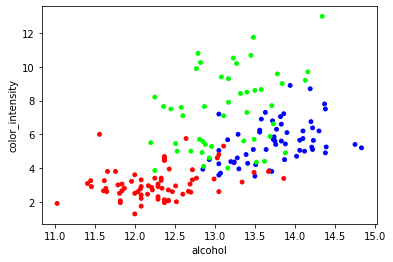

In [194]:
plt.scatter(data[:,0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]]);

In [195]:
# data normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [196]:
input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names) # class of numbers

In [197]:
net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

In [198]:
net = net.to(device)
net

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=3, bias=True)
  (3): Softmax(dim=None)
)

In [199]:
from torch import optim

# Loss Function
criterion = nn.CrossEntropyLoss().to(device)

# Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=1e-3)

In [200]:
X = torch.FloatTensor(data).to(device) # GPU
y = torch.LongTensor(targets).to(device)

In [201]:
import numpy as np 

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


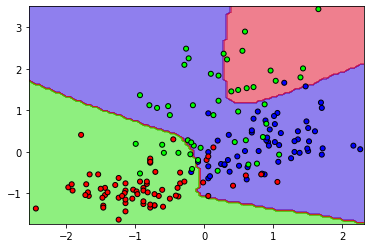

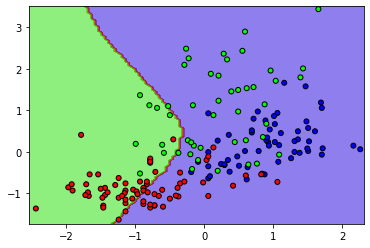

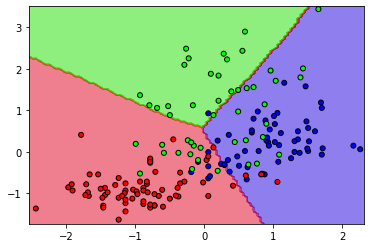

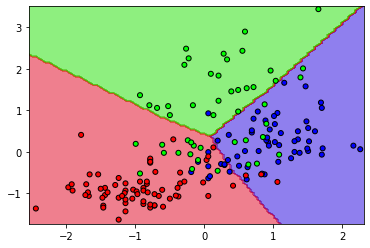

In [202]:
for i in range(200):
  # Forward 
  pred = net(X)
  loss = criterion(pred, y)

  # Backward
  loss.backward()
  optimizer.step()

  if i % 50 == 0:
    plt.figure()
    plot_boundary(data, targets, net)

##PyTorch Datasets

In [203]:
args = {'batch_size':20,
        'num_workers':4,
        'num_classes':10,
        'lr':1e-4,
        'weight_decay':5e-4,
        'num_epochs':30}

In [204]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import pandas as pd

In [205]:
train_set = datasets.MNIST('./', # dataset download root
                           train=True, # training model
                           transform=transforms.ToTensor(), # change to Tensor
                           download=True # downloading data
                            )

In [206]:
test_set = datasets.MNIST('./', train=False, transform=transforms.ToTensor(), download=False)

In [207]:
print(f'Train Samples: {len(train_set)} \nTest Samples: {len(test_set)}')

Train Samples: 60000 
Test Samples: 10000


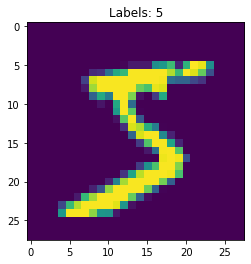

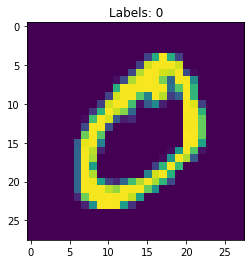

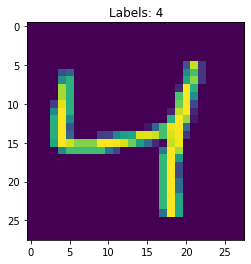

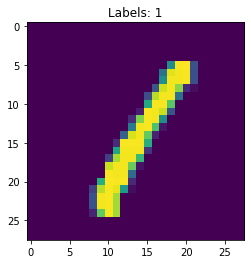

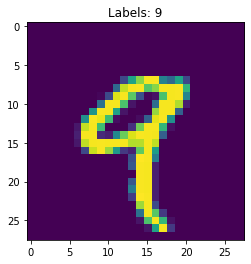

In [208]:
for i in range(5):
    data, label = train_set[i]
    plt.figure()
    plt.imshow(data[0])
    plt.title('Labels: ' + str(label))

In [209]:
train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [210]:
class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.Sigmoid(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output  = self.softmax(self.out(feature))

    return output

input_size  = 28 * 28
hidden_size = 128
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(device) #cast na GPU 

In [211]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [212]:
for epoch in range(args['num_epochs']):
#   start = time.time()

  epoch_loss = []
  for batch in train_loader:
    
    dado, rotulo = batch

    # Cast na GPU
    dado   = dado.to(device)
    rotulo = rotulo.to(device)

    # Forward 
    pred = net(dado)
    loss = criterion(pred, rotulo)
    epoch_loss.append(loss.cpu().data)

    # Backward
    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)
#   end = time.time()

  print(f"Epochs: {epoch+1} --- Loss Mean: {epoch_loss.mean()} --- Loss STD: {epoch_loss.std()}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epochs: 1 --- Loss Mean: 1.8612568378448486 --- Loss STD: 0.16542059183120728
Epochs: 2 --- Loss Mean: 1.7931007146835327 --- Loss STD: 0.10486733913421631
Epochs: 3 --- Loss Mean: 1.7880442142486572 --- Loss STD: 0.10639011859893799
Epochs: 4 --- Loss Mean: 1.7884886264801025 --- Loss STD: 0.10375167429447174
Epochs: 5 --- Loss Mean: 1.7945339679718018 --- Loss STD: 0.10516730695962906
Epochs: 6 --- Loss Mean: 1.8037382364273071 --- Loss STD: 0.10791946947574615
Epochs: 7 --- Loss Mean: 1.8051217794418335 --- Loss STD: 0.10887064039707184
Epochs: 8 --- Loss Mean: 1.806527018547058 --- Loss STD: 0.10644394159317017
Epochs: 9 --- Loss Mean: 1.8095903396606445 --- Loss STD: 0.10703068226575851
Epochs: 10 --- Loss Mean: 1.8033424615859985 --- Loss STD: 0.10559644550085068
Epochs: 11 --- Loss Mean: 1.8142998218536377 --- Loss STD: 0.10604135692119598
Epochs: 12 --- Loss Mean: 1.8273414373397827 --- Loss STD: 0.10715463012456894
Epochs: 13 --- Loss Mean: 1.819393515586853 --- Loss STD: 0.10

In [213]:
dataset = pd.read_csv('https://github.com/MpRonald/datasets/blob/main/bike_hour.csv?raw=true')
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [214]:
dataset.shape

(17379, 17)

In [215]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [216]:
torch.manual_seed(42)
idx = torch.randperm(len(dataset)).tolist()
train_size = int(0.8 * len(dataset))
df_train = dataset.iloc[idx[:train_size]]
df_test = dataset.iloc[idx[train_size:]]

In [217]:
df_train.to_csv('bike_train.csv', index=False)
df_test.to_csv('bike_test.csv', index=False)

In [218]:
class little_bike(Dataset):

    def __init__(self, csv_path):
        # loading dataset
        self.data = pd.read_csv(csv_path).to_numpy() 

    def __getitem__(self, idx):
        sample = self.data[idx][2:14]
        label = self.data[idx][-1:]

        # change to tensor
        sample = torch.from_numpy(sample.astype(np.float32))
        label = torch.from_numpy(label.astype(np.float32))

        return sample, label

    def __len__(self):
        return len(self.data)

In [219]:
class MLP(nn.Module):
  
  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()
    
    self.features = nn.Sequential(
          nn.Linear(input_size, hidden_size),
          nn.ReLU(),
          nn.Linear(hidden_size, hidden_size),
          nn.ReLU(),
    )
    
    self.classifier = nn.Sequential(
        nn.Linear(hidden_size, out_size),
        nn.ReLU(),
    )

  def forward(self, X):
    
    hidden = self.features(X)
    output = self.classifier(hidden)
    
    return output

In [220]:
train_set = little_bike('bike_train.csv')
test_set = little_bike('bike_test.csv')

In [221]:
train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [222]:
hidden_size = 128
out_size    = 1

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(device) #cast na GPU 

input_size = len(train_set[0][0])
net = MLP(input_size, hidden_size, out_size).to(device) # cast in GPU

criterion = nn.L1Loss().to(device)
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

##Training and Validation

In [223]:
def train(train_loader, net, epoch):
    net.train()
    epoch_loss = []
    for batch in train_loader:
        
        dado, rotulo = batch

        # Cast na GPU
        dado   = dado.to(device)
        rotulo = rotulo.to(device)

        # Forward 
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray(epoch_loss)
    #   end = time.time()

    print(f"Epochs TRAIN: {epoch+1} --- Loss Mean: {epoch_loss.mean()} --- Loss STD: {epoch_loss.std()}")

In [224]:
def test(test_loader, net, epoch):

    net.eval()
    with torch.no_grad():
        epoch_loss = []
        for batch in train_loader:
            
            dado, rotulo = batch

            # Cast na GPU
            dado   = dado.to(device)
            rotulo = rotulo.to(device)

            # Forward 
            pred = net(dado)
            loss = criterion(pred, rotulo)
            epoch_loss.append(loss.cpu().data)

        epoch_loss = np.asarray(epoch_loss)
        #   end = time.time()

        print(f"Epochs TEST: {epoch+1} --- Loss Mean: {epoch_loss.mean()} --- Loss STD: {epoch_loss.std()}")

In [225]:
for epoch in range(args['num_epochs']):
    train(train_loader, net, epoch)
    test(test_loader, net, epoch)
    print('-'*80)

Epochs TRAIN: 1 --- Loss Mean: 149.71441650390625 --- Loss STD: 39.62565994262695
Epochs TEST: 1 --- Loss Mean: 136.0177764892578 --- Loss STD: 22.644855499267578
--------------------------------------------------------------------------------
Epochs TRAIN: 2 --- Loss Mean: 123.2693862915039 --- Loss STD: 31.168804168701172
Epochs TEST: 2 --- Loss Mean: 114.72674560546875 --- Loss STD: 26.119749069213867
--------------------------------------------------------------------------------
Epochs TRAIN: 3 --- Loss Mean: 119.25505065917969 --- Loss STD: 26.816818237304688
Epochs TEST: 3 --- Loss Mean: 123.1203842163086 --- Loss STD: 30.325702667236328
--------------------------------------------------------------------------------
Epochs TRAIN: 4 --- Loss Mean: 117.95800018310547 --- Loss STD: 29.659997940063477
Epochs TEST: 4 --- Loss Mean: 111.56578826904297 --- Loss STD: 27.12034797668457
--------------------------------------------------------------------------------
Epochs TRAIN: 5 --- L

In [226]:
Xtest = torch.stack([tup[0] for tup in test_set])
Xtest = Xtest.to(device)

ytest = torch.stack([tup[1] for tup in test_set])
ypred = net(Xtest).cpu().data

data = torch.cat((ytest, ypred), axis=1)

df_results = pd.DataFrame(data, columns=['ypred', 'ytest'])
df_results.head(20)

,ypred,ytest
0,tensor(228.),tensor(276.6572)
1,tensor(126.),tensor(121.8443)
2,tensor(1.),tensor(2.1958)
3,tensor(236.),tensor(84.1433)
4,tensor(703.),tensor(438.3304)
5,tensor(10.),tensor(2.1958)
6,tensor(333.),tensor(160.7610)
7,tensor(234.),tensor(123.3454)
8,tensor(176.),tensor(251.8053)
9,tensor(362.),tensor(173.2912)
